In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

In [2]:
df = pd.read_csv('summer2016.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [4]:
df.columns[[0,1]]

Index(['Unnamed: 0', 'ID'], dtype='object')

In [5]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

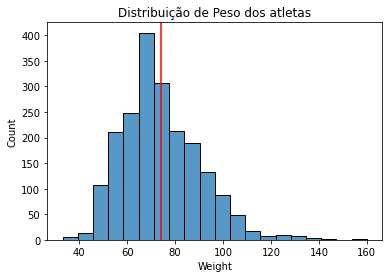

In [6]:
sns.histplot(df['Weight'], bins=20)
plt.axvline(df['Weight'].mean(), color='red', label='média')

plt.title('Distribuição de Peso dos atletas');

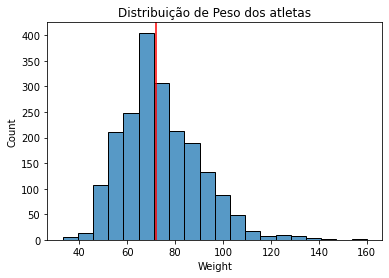

In [7]:
sns.histplot(df['Weight'], bins=20)
plt.axvline(df['Weight'].median(), color='red', label='mediana')

plt.title('Distribuição de Peso dos atletas');

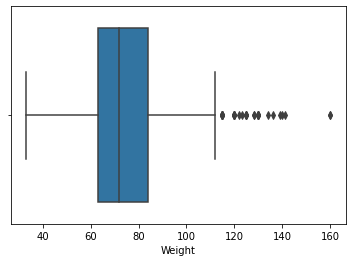

In [8]:
sns.boxplot(x=df['Weight'], data=df);

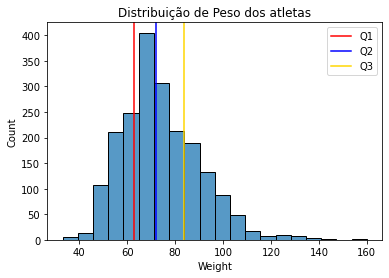

In [9]:
sns.histplot(df['Weight'], bins=20)
plt.axvline(df['Weight'].quantile(0.25), color='red', label='Q1')
plt.axvline(df['Weight'].quantile(0.5), color='blue', label='Q2')
plt.axvline(df['Weight'].quantile(0.75), color='gold', label='Q3')

plt.legend()

plt.title('Distribuição de Peso dos atletas')
plt.show();

In [10]:
df['Weight'].mode()

0    70.0
dtype: float64

In [11]:
df['Weight'].mean()

73.96573982125125

In [12]:
df['Weight'].median()

72.0

In [13]:
df['Weight'].value_counts()

70.0     98
65.0     88
75.0     75
68.0     66
80.0     62
         ..
33.0      1
37.0      1
122.0     1
134.0     1
140.0     1
Name: Weight, Length: 89, dtype: int64

In [14]:
df['Weight'].mode().shape

(1,)

In [15]:
df['Weight'].describe()

count    2014.00000
mean       73.96574
std        16.21923
min        33.00000
25%        63.00000
50%        72.00000
75%        83.75000
max       160.00000
Name: Weight, dtype: float64

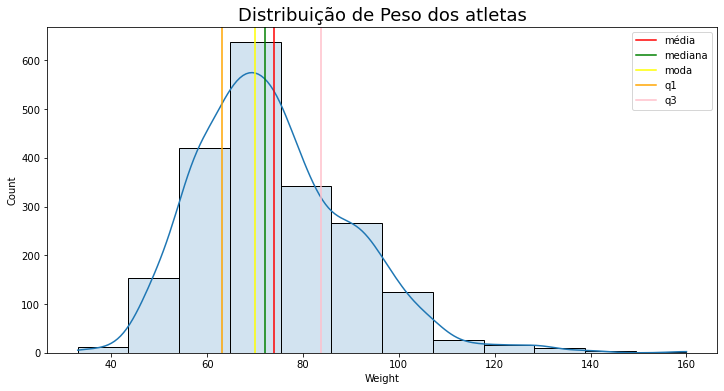

In [16]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição de Peso dos atletas", size=18)

# Plot do Histograma
sns.histplot(df['Weight'], kde=True, bins = 12, alpha=0.2)

# plotando média
plt.axvline(df['Weight'].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df['Weight'].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df['Weight'].mode().shape[0]):
    plt.axvline(df['Weight'].mode()[i], color="yellow", label="moda")

plt.axvline(df['Weight'].quantile(0.25), color="orange", label="q1")
plt.axvline(df['Weight'].quantile(0.75), color="pink", label="q3")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

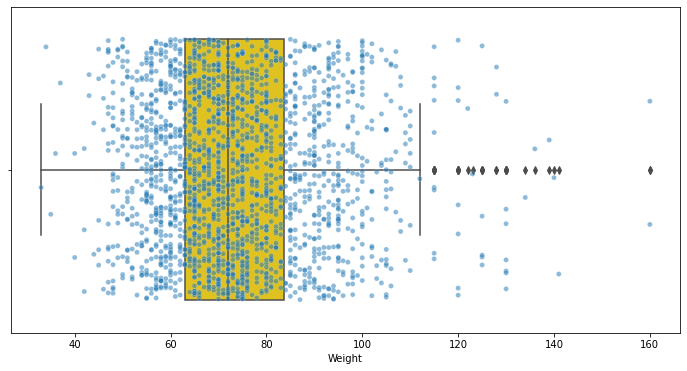

In [17]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df, x = 'Weight', color='gold')
ax = sns.stripplot(data=df, x='Weight',  
                    edgecolor='white', linewidth=0.3, jitter=0.4, alpha=0.5)

In [18]:
# Calcula o intervalo interquartil
df['Weight'].quantile(q=0.75) - df['Weight'].quantile(q=0.25)

20.75

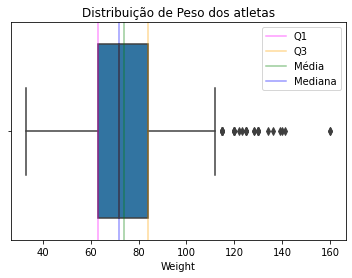

In [19]:





sns.boxplot(data=df, x='Weight')

plt.axvline(np.quantile(df['Weight'], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axvline(np.quantile(df['Weight'], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axvline(np.mean(df['Weight']), color="green", label="Média", alpha=0.4)
plt.axvline(np.median(df['Weight']), color="blue", label="Mediana", alpha=0.4)
plt.legend()



plt.title('Distribuição de Peso dos atletas')
plt.show();

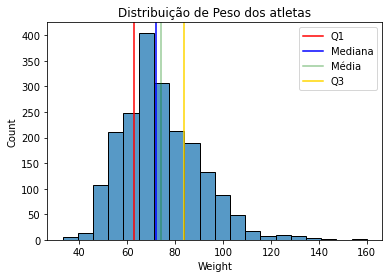

In [20]:
sns.histplot(df['Weight'], bins=20)
plt.axvline(df['Weight'].quantile(0.25), color='red', label='Q1')
plt.axvline(df['Weight'].quantile(0.5), color='blue', label='Mediana')
plt.axvline(np.mean(df['Weight']), color="green", label="Média", alpha=0.4)
plt.axvline(df['Weight'].quantile(0.75), color='gold', label='Q3')

plt.legend()
plt.title('Distribuição de Peso dos atletas')
plt.show();

In [21]:
# Print do Valor da Variância
df['Weight'].var()

263.0634058855765

In [22]:
# Print do Desvio Padrão (standard deviation)
df['Weight'].std()

16.219229509615325

In [23]:
df['Weight'].skew()

0.8223023120044239

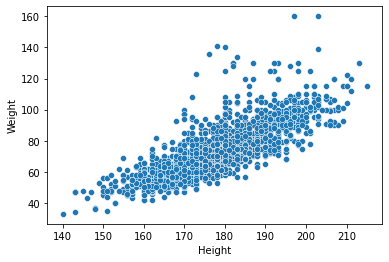

In [24]:
sns.scatterplot(x = df['Height'], y =df['Weight'], data=df );

In [25]:
df.corr()

,Age,Height,Weight,Year
Age,1.000000,0.133661,0.161131,NaN
Height,0.133661,1.000000,0.794749,NaN
Weight,0.161131,0.794749,1.000000,NaN
Year,NaN,NaN,NaN,NaN


In [26]:
df.corr(method='spearman')

,Age,Height,Weight,Year
Age,1.000000,0.142687,0.181356,NaN
Height,0.142687,1.000000,0.826378,NaN
Weight,0.181356,0.826378,1.000000,NaN
Year,NaN,NaN,NaN,NaN


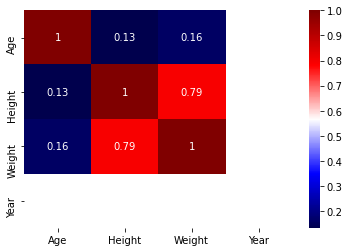

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='seismic');

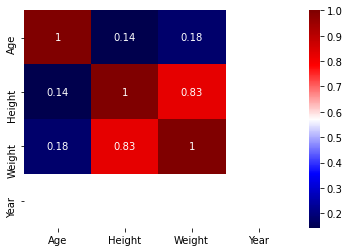

In [28]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='seismic');

In [29]:
#Classes xe peso
classe_peso = pd.cut(np.array(df['Weight']),bins=int(df.Height.std()),precision=0)

In [30]:
classe_peso.unique()

[(79.0, 91.0], (45.0, 56.0], (56.0, 68.0], (91.0, 102.0], (68.0, 79.0], ..., (102.0, 114.0], (33.0, 45.0], (125.0, 137.0], (148.0, 160.0], (137.0, 148.0]]
Length: 11
Categories (11, interval[float64]): [(33.0, 45.0] < (45.0, 56.0] < (56.0, 68.0] < (68.0, 79.0] ... (114.0, 125.0] < (125.0, 137.0] < (137.0, 148.0] < (148.0, 160.0]]

In [31]:
classe_peso.value_counts()

(33.0, 45.0]       14
(45.0, 56.0]      231
(56.0, 68.0]      512
(68.0, 79.0]      606
(79.0, 91.0]      336
(91.0, 102.0]     220
(102.0, 114.0]     56
(114.0, 125.0]     23
(125.0, 137.0]     11
(137.0, 148.0]      3
(148.0, 160.0]      2
dtype: int64

In [32]:
df['Weight_bins'] = classe_peso

In [33]:
df['Weight_class'] = pd.cut(np.array(df['Weight']),bins=int(df.Height.std()),precision=0, )

In [34]:
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Weight_bins,Weight_class
0,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,"(79.0, 91.0]","(79.0, 91.0]"
1,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,"(45.0, 56.0]","(45.0, 56.0]"
2,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,"(79.0, 91.0]","(79.0, 91.0]"
3,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze,"(79.0, 91.0]","(79.0, 91.0]"
4,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver,"(56.0, 68.0]","(56.0, 68.0]"


In [35]:
#Tabelas de frequência por Peso
freq_table = pd.concat([df.Weight_bins.value_counts(),
                        round(df.Weight_bins.value_counts(normalize = True),3)],
                       axis = 1,
                       keys = ("freq", "freq_relativa"), names=['Weight_bins'])
freq_table

Weight_bins,freq,freq_relativa
"(68.0, 79.0]",606,0.301
"(56.0, 68.0]",512,0.254
"(79.0, 91.0]",336,0.167
"(45.0, 56.0]",231,0.115
"(91.0, 102.0]",220,0.109
"(102.0, 114.0]",56,0.028
"(114.0, 125.0]",23,0.011
"(33.0, 45.0]",14,0.007
"(125.0, 137.0]",11,0.005
"(137.0, 148.0]",3,0.001


In [36]:
freq_table['freq_percentual'] = freq_table['freq_relativa']*100
freq_table

Weight_bins,freq,freq_relativa,freq_percentual
"(68.0, 79.0]",606,0.301,30.1
"(56.0, 68.0]",512,0.254,25.4
"(79.0, 91.0]",336,0.167,16.7
"(45.0, 56.0]",231,0.115,11.5
"(91.0, 102.0]",220,0.109,10.9
"(102.0, 114.0]",56,0.028,2.8
"(114.0, 125.0]",23,0.011,1.1
"(33.0, 45.0]",14,0.007,0.7
"(125.0, 137.0]",11,0.005,0.5
"(137.0, 148.0]",3,0.001,0.1


In [37]:
freq_table['freq_acumulada'] = freq_table['freq_percentual'].cumsum()
freq_table

Weight_bins,freq,freq_relativa,freq_percentual,freq_acumulada
"(68.0, 79.0]",606,0.301,30.1,30.1
"(56.0, 68.0]",512,0.254,25.4,55.5
"(79.0, 91.0]",336,0.167,16.7,72.2
"(45.0, 56.0]",231,0.115,11.5,83.7
"(91.0, 102.0]",220,0.109,10.9,94.6
"(102.0, 114.0]",56,0.028,2.8,97.4
"(114.0, 125.0]",23,0.011,1.1,98.5
"(33.0, 45.0]",14,0.007,0.7,99.2
"(125.0, 137.0]",11,0.005,0.5,99.7
"(137.0, 148.0]",3,0.001,0.1,99.8


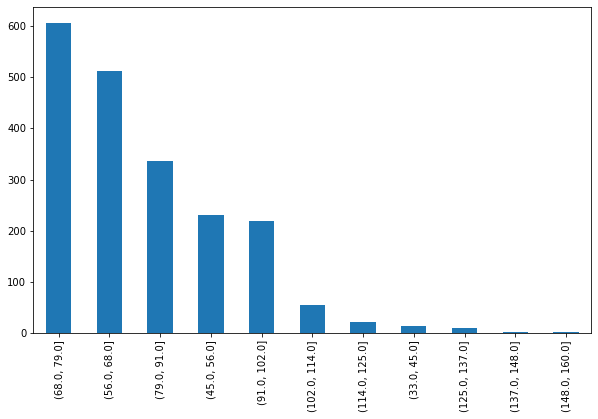

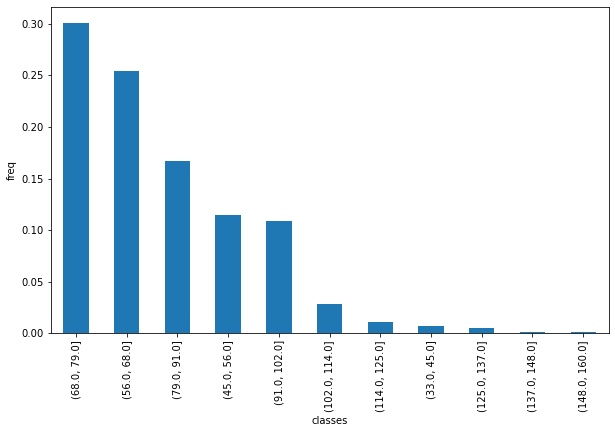

In [38]:
plt.figure(figsize=(10,6))
freq_table.freq.plot(kind = "bar")
plt.show()
ax = freq_table.freq_relativa.plot.bar(figsize=(10,6))
ax.set_xlabel("classes")
ax.set_ylabel("freq")
plt.show()

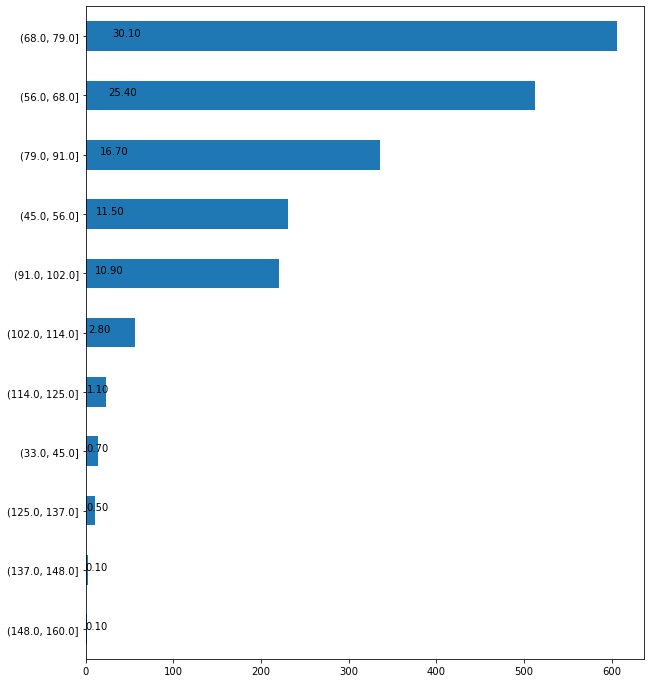

In [39]:
plt.figure(figsize=(10,12))

ax = freq_table.freq.sort_values(ascending=True).plot(kind='barh') # s is a Series (float) in [0,1]
[ax.text(v, i, f'{v:.2f}') for i, v in enumerate((freq_table.freq_percentual).sort_values(ascending=True))];

In [40]:
#Tabelas de frequência por Esporte

freq_table = pd.concat([df.Sport.value_counts(),
                        round(df.Sport.value_counts(normalize = True),3)],
                       axis = 1,
                       keys = ("freq", "freq_relativa"))
freq_table

,freq,freq_relativa
Swimming,190,0.094
Athletics,188,0.093
Rowing,144,0.071
Football,105,0.052
Hockey,99,0.049
Handball,89,0.044
Cycling,84,0.042
Canoeing,82,0.041
Water Polo,78,0.039
Rugby Sevens,74,0.037


In [41]:
freq_table['freq_percentual'] = freq_table['freq_relativa']*100
freq_table

,freq,freq_relativa,freq_percentual
Swimming,190,0.094,9.4
Athletics,188,0.093,9.3
Rowing,144,0.071,7.1
Football,105,0.052,5.2
Hockey,99,0.049,4.9
Handball,89,0.044,4.4
Cycling,84,0.042,4.2
Canoeing,82,0.041,4.1
Water Polo,78,0.039,3.9
Rugby Sevens,74,0.037,3.7


In [42]:
freq_table['freq_acumulada'] = freq_table['freq_percentual'].cumsum()
freq_table

,freq,freq_relativa,freq_percentual,freq_acumulada
Swimming,190,0.094,9.4,9.4
Athletics,188,0.093,9.3,18.7
Rowing,144,0.071,7.1,25.8
Football,105,0.052,5.2,31.0
Hockey,99,0.049,4.9,35.9
Handball,89,0.044,4.4,40.3
Cycling,84,0.042,4.2,44.5
Canoeing,82,0.041,4.1,48.6
Water Polo,78,0.039,3.9,52.5
Rugby Sevens,74,0.037,3.7,56.2


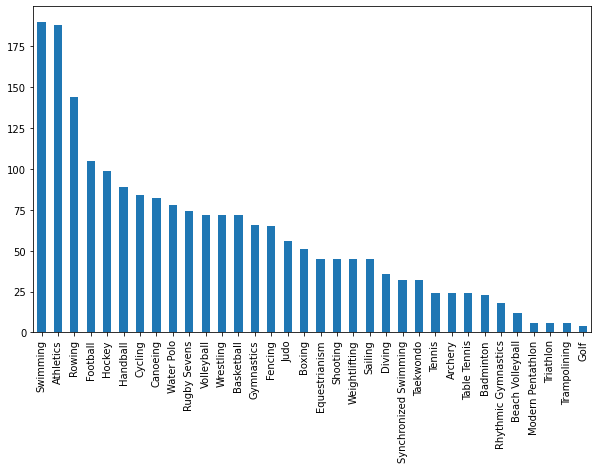

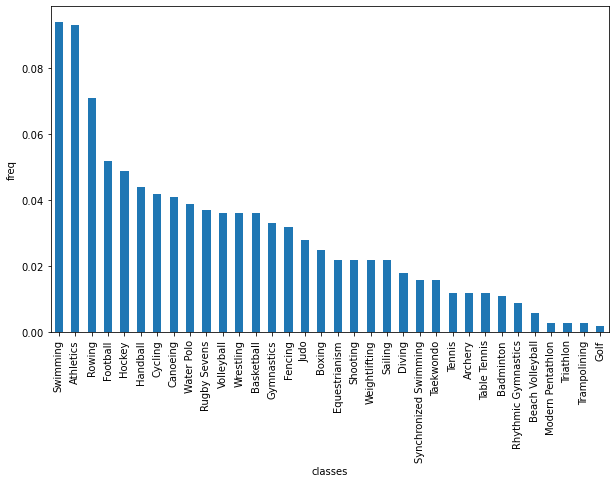

In [43]:
plt.figure(figsize=(10,6))
freq_table.freq.plot(kind = "bar")
plt.show()
ax = freq_table.freq_relativa.plot.bar(figsize=(10,6))
ax.set_xlabel("classes")
ax.set_ylabel("freq")
plt.show()

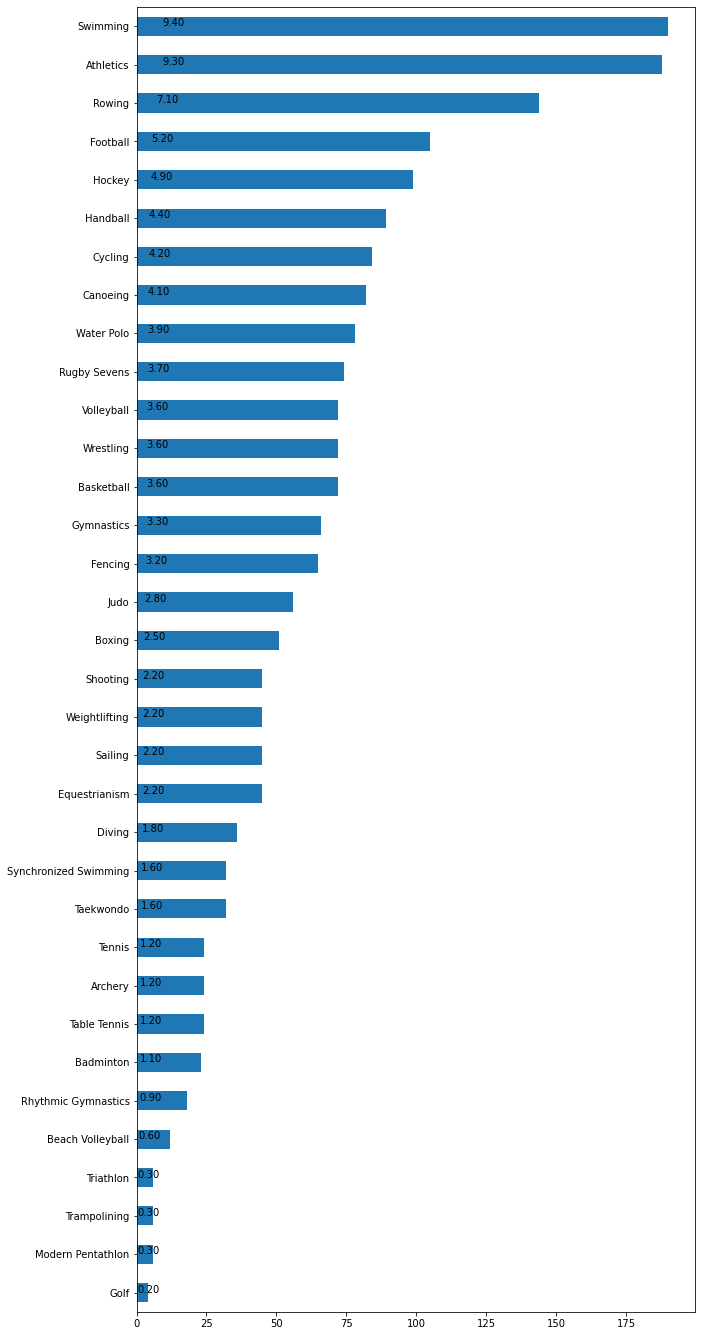

In [44]:
plt.figure(figsize=(10,24))

ax = freq_table.freq.sort_values(ascending=True).plot(kind='barh') # s is a Series (float) in [0,1]
[ax.text(v, i, f'{v:.2f}') for i, v in enumerate((freq_table.freq_percentual).sort_values(ascending=True))];